In [1]:
#---------------------------------------------------------------------------------
#                                 _             _      
#                                | |_  ___ _ __(_)__ _ 
#                                | ' \/ -_) '_ \ / _` |
#                                |_||_\___| .__/_\__,_|
#                                         |_|          
#
#---------------------------------------------------------------------------------
#
# Company: HEPIA // HES-SO
# Engineer: Hugo Varenne <hugo.varenne@master.hes-so.ch>
# 
# Project Name: Unleashing the Full Potential of 
#               High-Performance Cherenkov Telescopes
#               with Fully-Digital Solid-State Sensors Camera
#
# File: 2.2_trimodel.ipynb
# Description: Notebook for handling trimodel usage
#
# Last update: 2025-08-31
#
#--------------------------------------------------------------------------------

In [2]:
import sys
import os
import astropy.units as u
import importlib
from ctlearn_manager import load_model_from_index, CTLearnTriModelManager, DataSample
from ctlearn_manager.utils.utils import ParticleType
from ctlearn_manager.utils import Cuts, CutType, DefaultCuts
import hdf5plugin, h5py
import pandas as pd
import glob
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tools_path = os.path.join("../tools")
if tools_path not in sys.path:
    sys.path.append(tools_path)

import tools.CTLearnMgrConfig as CTLearnMgrConfig
importlib.reload(CTLearnMgrConfig)
import tools.CTLearnModelPredict as CTLearnModelPredict
importlib.reload(CTLearnModelPredict)

2025-09-24 09:20:58.180789: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:20:58.224411: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:20:58.392348: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:20:58.392389: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:20:58.393125: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

<module 'tools.CTLearnModelPredict' from '/home/hugo/TM/ml/tools/CTLearnModelPredict.py'>

In [4]:
ctlearn_mgr_config = CTLearnMgrConfig.CTLearnMgrConfig()
ctlearn_mgr_config.load_config('../config/ctlearnmgr_config.yml')
ctlearn_mgr_config.print_config()

Base Directory: /home/hugo/TM
Simtel Relative Directory: data
Training Samples Directory: samples
Workspace Directory: ml
Simtel Path: /home/hugo/TM/data
Training Samples Path: /home/hugo/TM/data/samples
Workspace Path: /home/hugo/TM/ml
Model Index File: /home/hugo/TM/ml/ctlearn_models_index.h5


In [5]:
type_model = load_model_from_index("type_tel2_20deg", ctlearn_mgr_config.model_index_file)
energy_model = load_model_from_index("energy_tel2_20deg", ctlearn_mgr_config.model_index_file)
direction_model = load_model_from_index("skydirection_tel2_20deg", ctlearn_mgr_config.model_index_file)


trimodel = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model)

🧠🧠🧠 CTLearnTriModelManager ▮ skydirection_tel2_20deg ▮ energy_tel2_20deg ▮ type_tel2_20deg ▮
Available MC DL2 directions:
(ZD, Az): (20.0 * u.deg, 175.1963 * u.deg) 	 gamma_diffuse | proton


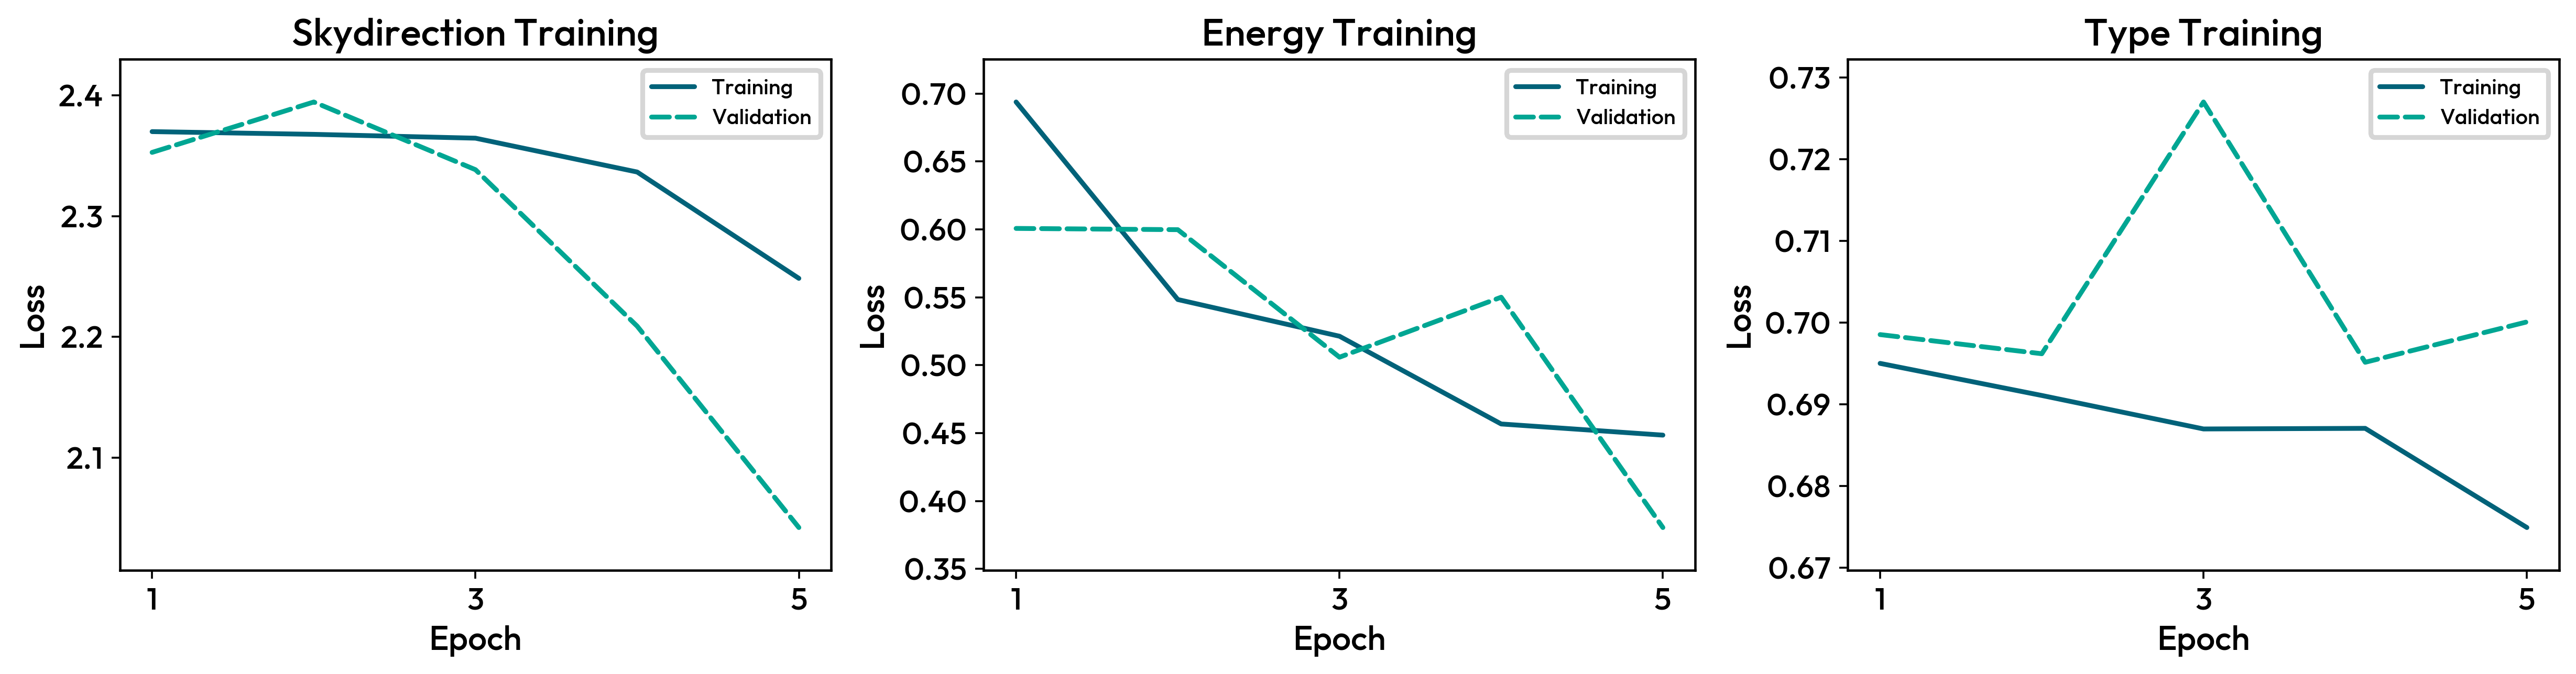

In [6]:
trimodel.plot_loss()

In [7]:
gammas_test_dir = os.path.join(ctlearn_mgr_config.training_samples_path, 'gamma', 'test')
protons_test_dir = os.path.join(ctlearn_mgr_config.training_samples_path, 'proton', 'test')
testing_samples = [
    DataSample(directory=gammas_test_dir,
            pattern="gamma*.h5"),
    DataSample(directory=protons_test_dir,
            pattern="proton*.h5"),
]

Checking files for particle type and pointing: 100%|████████████████████████████████████| 3/3 [00:00<00:00, 56.34file/s]


	 -> gamma_diffuse @ (20.0 deg, 175.1963 deg)


Checking files for particle type and pointing: 100%|███████████████████████████████████| 3/3 [00:00<00:00, 106.57file/s]

	 -> proton @ (20.0 deg, 175.1963 deg)


In [8]:
trimodel.set_testing_data(testing_samples)

Setting testing data: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 70.34it/s]

Available testing directions:
(ZD, Az): (20.0 * u.deg, 175.1963 * u.deg)	gamma_diffuse | proton


Available testing directions:
(ZD, Az): (20.0 * u.deg, 175.1963 * u.deg)	gamma_diffuse | proton
Available MC DL2 directions:
(ZD, Az): (20.0 * u.deg, 175.1963 * u.deg) 	 gamma_diffuse | proton
🔧 Not using any cluster


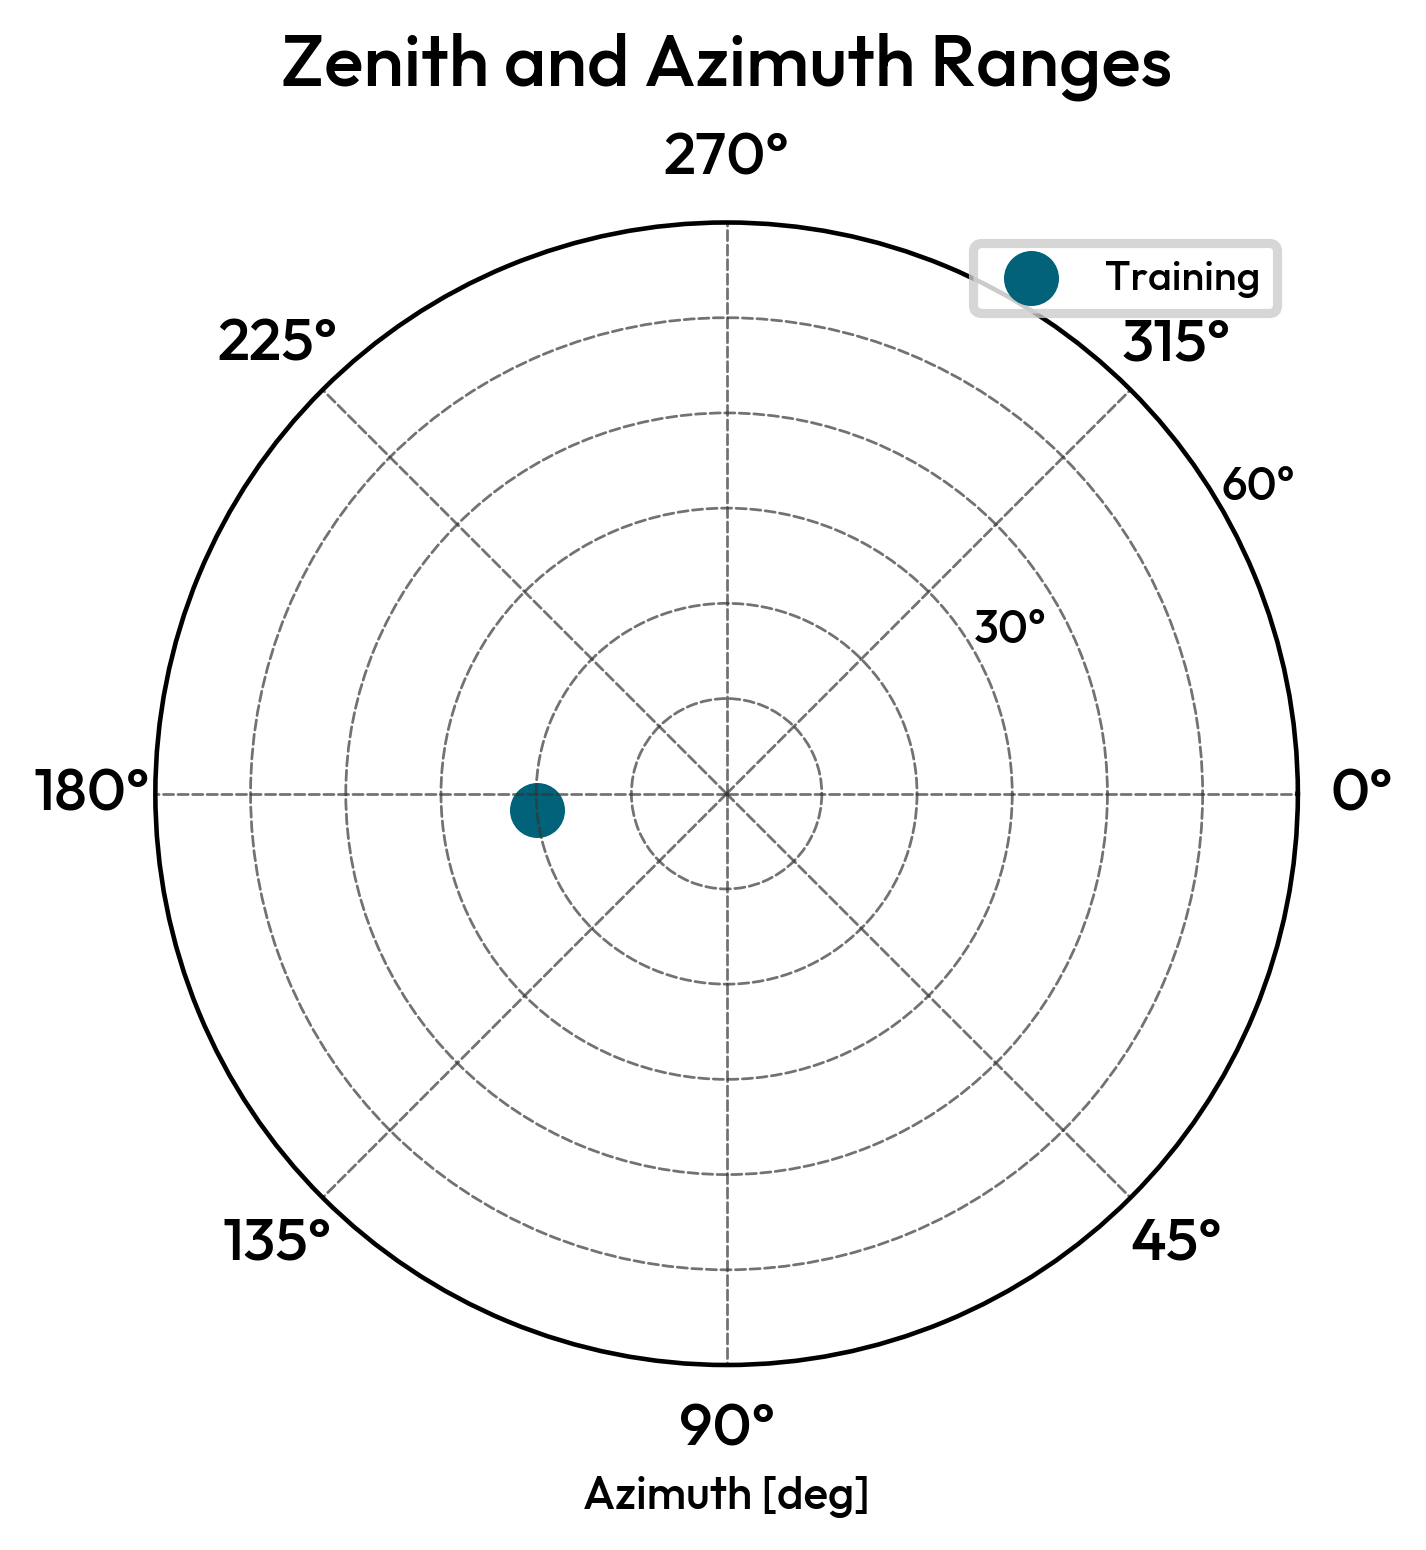

In [9]:
trimodel.plot_zenith_azimuth_ranges()
trimodel.get_available_testing_directions()
trimodel.get_available_MC_directions()
trimodel.cluster_configuration.info()

In [10]:
trimodel.launch_testing(20.0 * u.deg, 175.1963 * u.deg,
     output_dirs = [os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "test", "gamma_diffuse"), os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "test", "proton")],
     launch_particle_types=[ParticleType.GAMMA_DIFFUSE, ParticleType.PROTON], # Add as much as you want, must provide a directory for each
     #config_dir="../config/ctlearnmgr_config.yml", # Where the .sh scripts, configs and logs will be stored
     batch_size=64,
     overwrite=True,
     # Other options are available
     )

🔧 Not using any cluster


Checking files for particle type and pointing: 100%|███████████████████████████████████| 3/3 [00:00<00:00, 123.89file/s]


	 -> gamma_diffuse @ (20.0 deg, 175.1963 deg)


Checking files for particle type and pointing: 100%|███████████████████████████████████| 3/3 [00:00<00:00, 135.13file/s]

	 -> proton @ (20.0 deg, 175.1963 deg)


ctlearn-predict-mono-model --input_url /home/hugo/TM/data/samples/gamma/test/gamma_200_800E3GeV_20_20deg_ATM52_100505.corsika.gz.NSBmed4.simtel.h5 --PredictCTLearnModel.batch_size=64 --type_model=/home/hugo/TM/ml/type_tel2_20deg/type_tel2_20deg_v0/ctlearn_model.cpk --energy_model=/home/hugo/TM/ml/energy_tel2_20deg/energy_tel2_20deg_v0/ctlearn_model.cpk --cameradirection_model=/home/hugo/TM/ml/skydirection_tel2_20deg/skydirection_tel2_20deg_v0/ctlearn_model.cpk --no-dl1-images --no-true-images --output /home/hugo/TM/ml/trimodel/test/gamma_diffuse/gamma_200_800E3GeV_20_20deg_ATM52_100505.corsika.gz.NSBmed4.simtel.h5 --use-HDF5Merger --dl2-subarray --PredictCTLearnModel.overwrite_tables=True -v --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time   


2025-09-24 09:21:05.139590: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:21:05.141339: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:21:05.168789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:21:05.168845: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:21:05.168880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

ctlearn-predict-mono-model --input_url /home/hugo/TM/data/samples/gamma/test/gamma_200_800E3GeV_20_20deg_ATM52_100575.corsika.gz.NSBmed4.simtel.h5 --PredictCTLearnModel.batch_size=64 --type_model=/home/hugo/TM/ml/type_tel2_20deg/type_tel2_20deg_v0/ctlearn_model.cpk --energy_model=/home/hugo/TM/ml/energy_tel2_20deg/energy_tel2_20deg_v0/ctlearn_model.cpk --cameradirection_model=/home/hugo/TM/ml/skydirection_tel2_20deg/skydirection_tel2_20deg_v0/ctlearn_model.cpk --no-dl1-images --no-true-images --output /home/hugo/TM/ml/trimodel/test/gamma_diffuse/gamma_200_800E3GeV_20_20deg_ATM52_100575.corsika.gz.NSBmed4.simtel.h5 --use-HDF5Merger --dl2-subarray --PredictCTLearnModel.overwrite_tables=True -v --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time   


2025-09-24 09:21:08.424064: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:21:08.425692: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:21:08.451363: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:21:08.451472: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:21:08.451497: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

ctlearn-predict-mono-model --input_url /home/hugo/TM/data/samples/gamma/test/gamma_200_800E3GeV_20_20deg_ATM52_110055.corsika.gz.NSBmed4.simtel.h5 --PredictCTLearnModel.batch_size=64 --type_model=/home/hugo/TM/ml/type_tel2_20deg/type_tel2_20deg_v0/ctlearn_model.cpk --energy_model=/home/hugo/TM/ml/energy_tel2_20deg/energy_tel2_20deg_v0/ctlearn_model.cpk --cameradirection_model=/home/hugo/TM/ml/skydirection_tel2_20deg/skydirection_tel2_20deg_v0/ctlearn_model.cpk --no-dl1-images --no-true-images --output /home/hugo/TM/ml/trimodel/test/gamma_diffuse/gamma_200_800E3GeV_20_20deg_ATM52_110055.corsika.gz.NSBmed4.simtel.h5 --use-HDF5Merger --dl2-subarray --PredictCTLearnModel.overwrite_tables=True -v --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time   


2025-09-24 09:21:11.663064: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:21:11.664799: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:21:11.687699: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:21:11.687758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:21:11.687777: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

ctlearn-predict-mono-model --input_url /home/hugo/TM/data/samples/proton/test/proton_400_1300E3GeV_20_20deg_ATM52_206029.corsika.gz.NSBmed4.simtel.h5 --PredictCTLearnModel.batch_size=64 --type_model=/home/hugo/TM/ml/type_tel2_20deg/type_tel2_20deg_v0/ctlearn_model.cpk --energy_model=/home/hugo/TM/ml/energy_tel2_20deg/energy_tel2_20deg_v0/ctlearn_model.cpk --cameradirection_model=/home/hugo/TM/ml/skydirection_tel2_20deg/skydirection_tel2_20deg_v0/ctlearn_model.cpk --no-dl1-images --no-true-images --output /home/hugo/TM/ml/trimodel/test/proton/proton_400_1300E3GeV_20_20deg_ATM52_206029.corsika.gz.NSBmed4.simtel.h5 --use-HDF5Merger --dl2-subarray --PredictCTLearnModel.overwrite_tables=True -v --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time   


2025-09-24 09:21:14.768703: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:21:14.770089: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:21:14.792319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:21:14.792371: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:21:14.792388: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

ctlearn-predict-mono-model --input_url /home/hugo/TM/data/samples/proton/test/proton_400_1300E3GeV_20_20deg_ATM52_206075.corsika.gz.NSBmed4.simtel.h5 --PredictCTLearnModel.batch_size=64 --type_model=/home/hugo/TM/ml/type_tel2_20deg/type_tel2_20deg_v0/ctlearn_model.cpk --energy_model=/home/hugo/TM/ml/energy_tel2_20deg/energy_tel2_20deg_v0/ctlearn_model.cpk --cameradirection_model=/home/hugo/TM/ml/skydirection_tel2_20deg/skydirection_tel2_20deg_v0/ctlearn_model.cpk --no-dl1-images --no-true-images --output /home/hugo/TM/ml/trimodel/test/proton/proton_400_1300E3GeV_20_20deg_ATM52_206075.corsika.gz.NSBmed4.simtel.h5 --use-HDF5Merger --dl2-subarray --PredictCTLearnModel.overwrite_tables=True -v --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time   


2025-09-24 09:21:18.873709: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:21:18.875314: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:21:18.898314: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:21:18.898379: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:21:18.898399: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

ctlearn-predict-mono-model --input_url /home/hugo/TM/data/samples/proton/test/proton_400_1300E3GeV_20_20deg_ATM52_206092.corsika.gz.NSBmed4.simtel.h5 --PredictCTLearnModel.batch_size=64 --type_model=/home/hugo/TM/ml/type_tel2_20deg/type_tel2_20deg_v0/ctlearn_model.cpk --energy_model=/home/hugo/TM/ml/energy_tel2_20deg/energy_tel2_20deg_v0/ctlearn_model.cpk --cameradirection_model=/home/hugo/TM/ml/skydirection_tel2_20deg/skydirection_tel2_20deg_v0/ctlearn_model.cpk --no-dl1-images --no-true-images --output /home/hugo/TM/ml/trimodel/test/proton/proton_400_1300E3GeV_20_20deg_ATM52_206092.corsika.gz.NSBmed4.simtel.h5 --use-HDF5Merger --dl2-subarray --PredictCTLearnModel.overwrite_tables=True -v --DLImageReader.channels=cleaned_image --DLImageReader.channels=cleaned_relative_peak_time   


2025-09-24 09:21:22.137617: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:21:22.139061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-24 09:21:22.161996: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 09:21:22.162051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 09:21:22.162070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [11]:
zenith, azimuth = 20.0 * u.deg, 175.1963 * u.deg

Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002


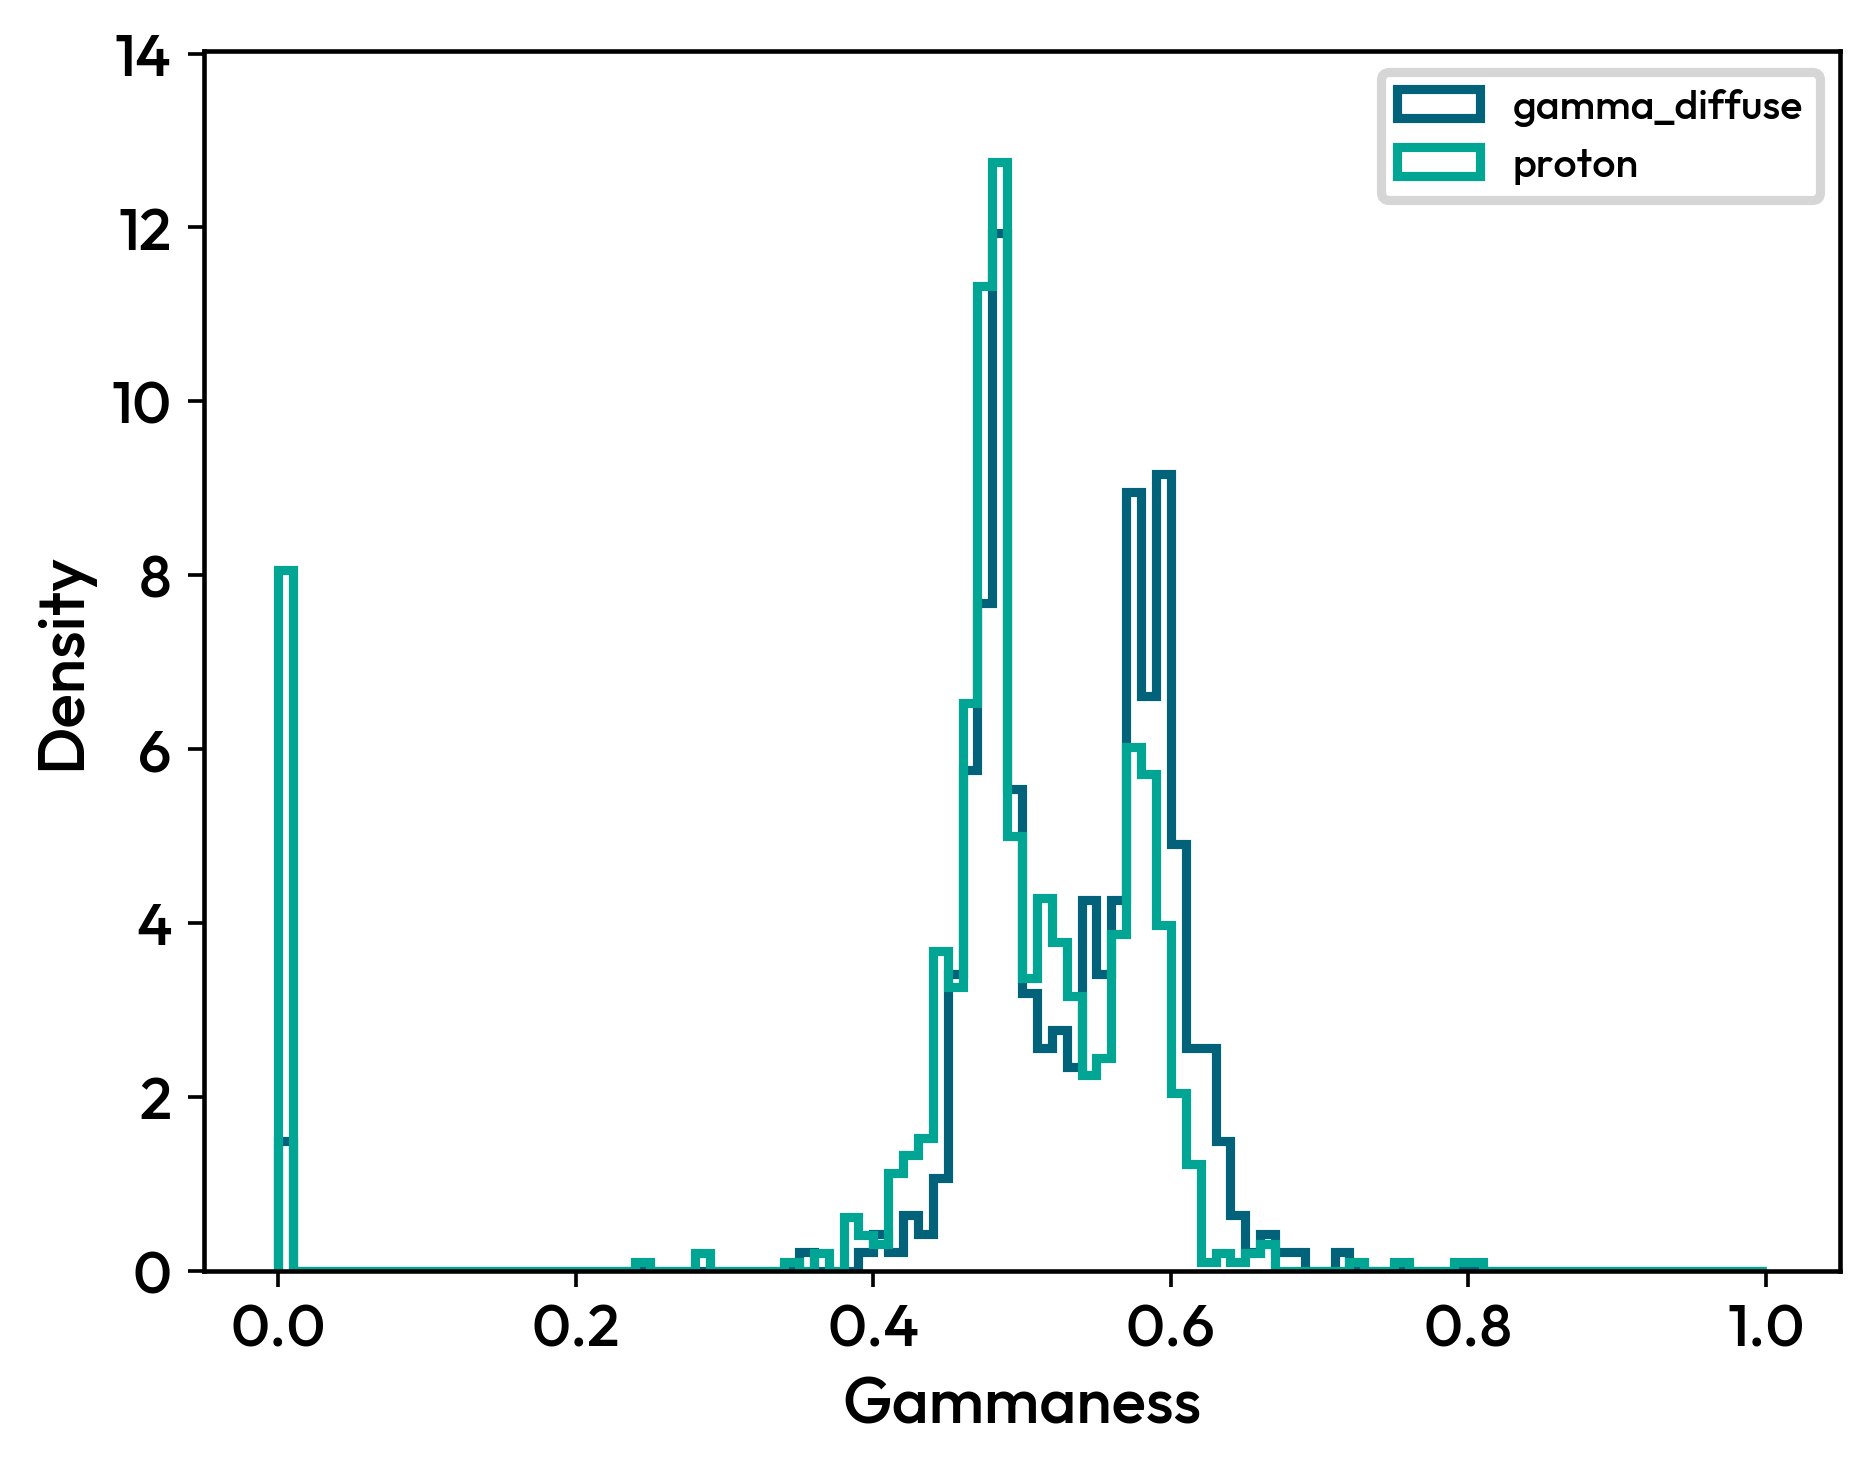

In [12]:
trimodel.plot_DL2_classification(zenith, azimuth, [ParticleType.GAMMA_DIFFUSE, ParticleType.PROTON])

In [13]:
trimodel.plot_ROC_curve_DL2(zenith, azimuth, nbins=3)

Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002


TypeError: list indices must be integers or slices, not str

Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002


KeyError: 'CTLearn_tel_alt'

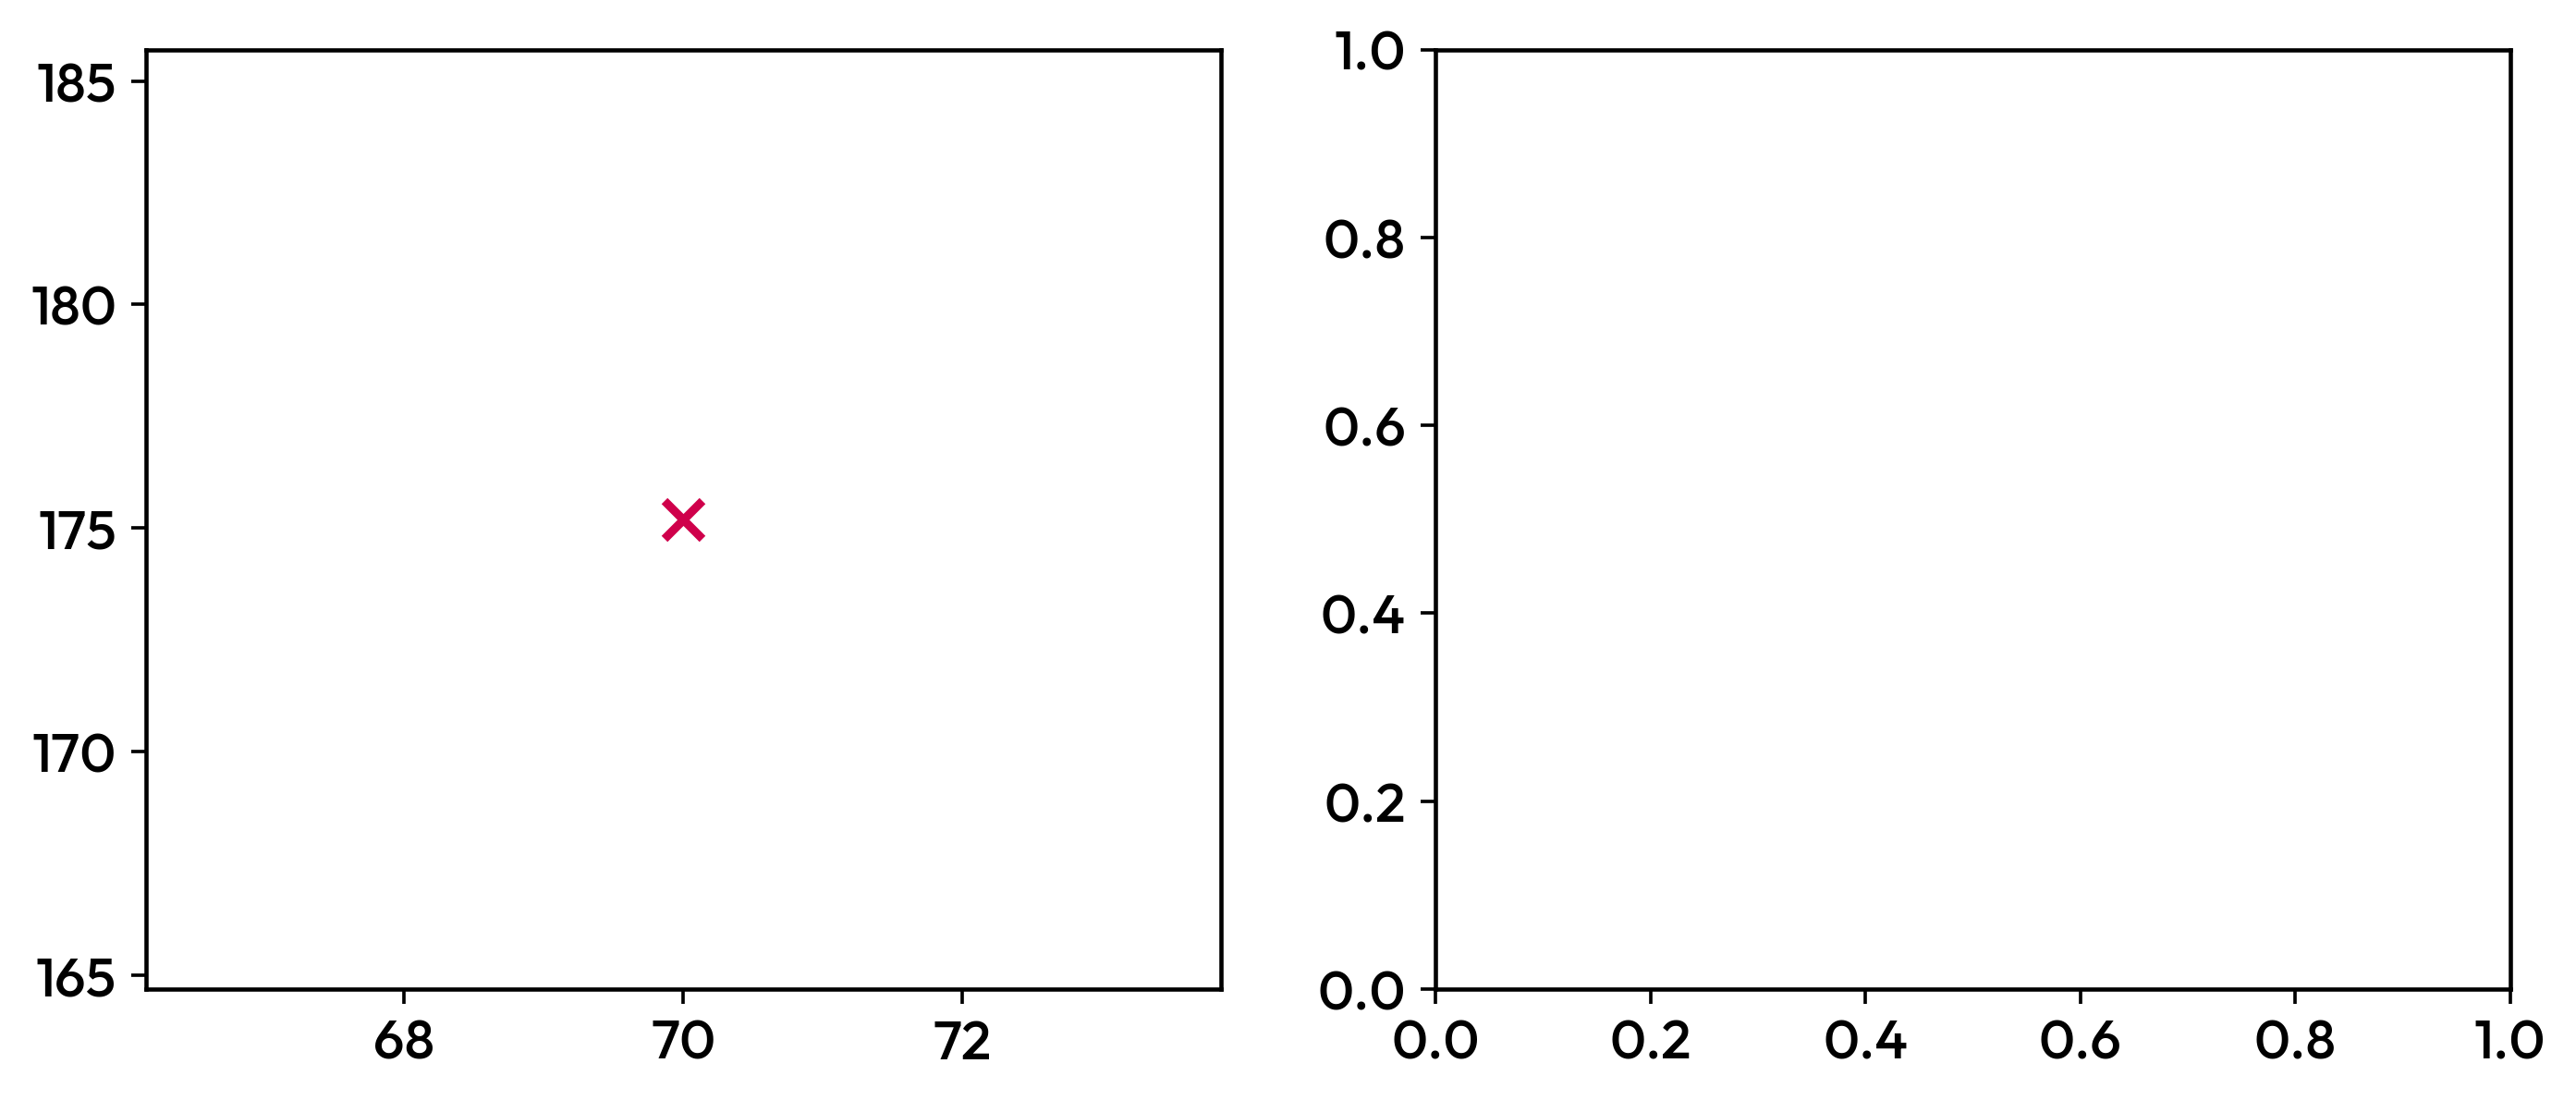

In [14]:
trimodel.plot_DL2_AltAz(zenith, azimuth, particle_types=[ParticleType.GAMMA_DIFFUSE, ParticleType.PROTON])

OSError: Path skydirection_tel2_20deg/DL2/MC/gamma_point does not exist

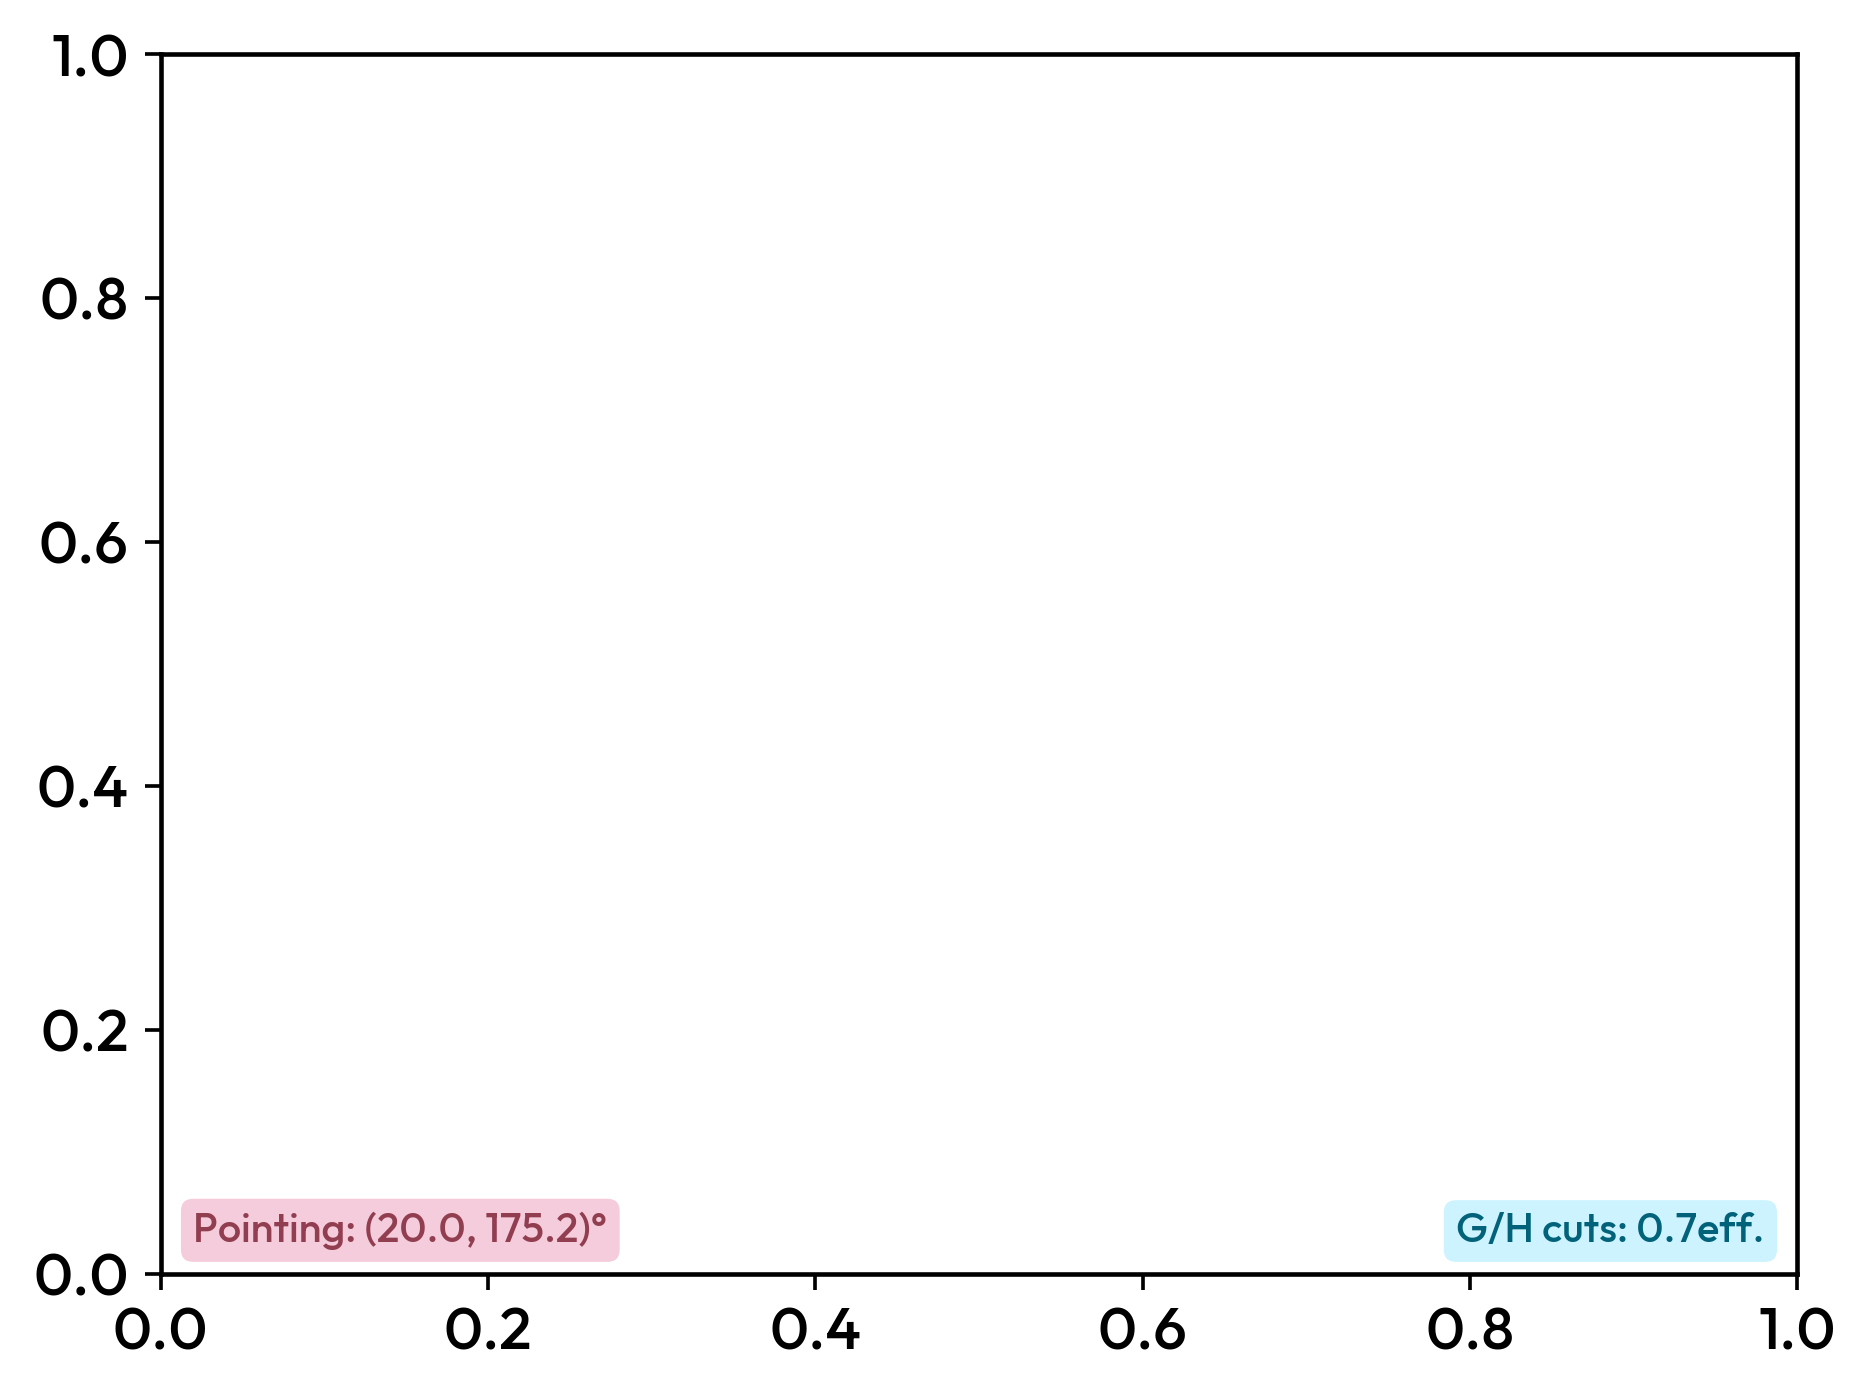

In [15]:
zeniths = np.array([20.0]) * u.deg
azimuths = np.array([175.1963]) * u.deg
trimodel.plot_angular_resolution_DL2(zeniths, azimuths, cuts=[DefaultCuts.EFF_70.value]) # One specific zenith and azimuth with 70% efficiency cut, you can have multiple zeniths and azimuths if you only have one cut
trimodel.plot_angular_resolution_DL2(zeniths, azimuths, cuts=[DefaultCuts.EFF_70.value, Cuts(gammaness_cut=0.9)]) # One specific zenith and azimuth with 70% efficiency cut and global 0.9 gammaness cut
trimodel.plot_angular_resolution_DL2(cuts=[Cuts(gammaness_cut=0.9)]) # All available zeniths and azimuths with gloabal 0.9 gammaness cut

Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002
Geometry table not found for dl2/event/telescope/geometry/CTLearn/tel_002


/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/hugo/TM/CTLearn-Manager/src/ctlearn_manager/tri_model.py:1164: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


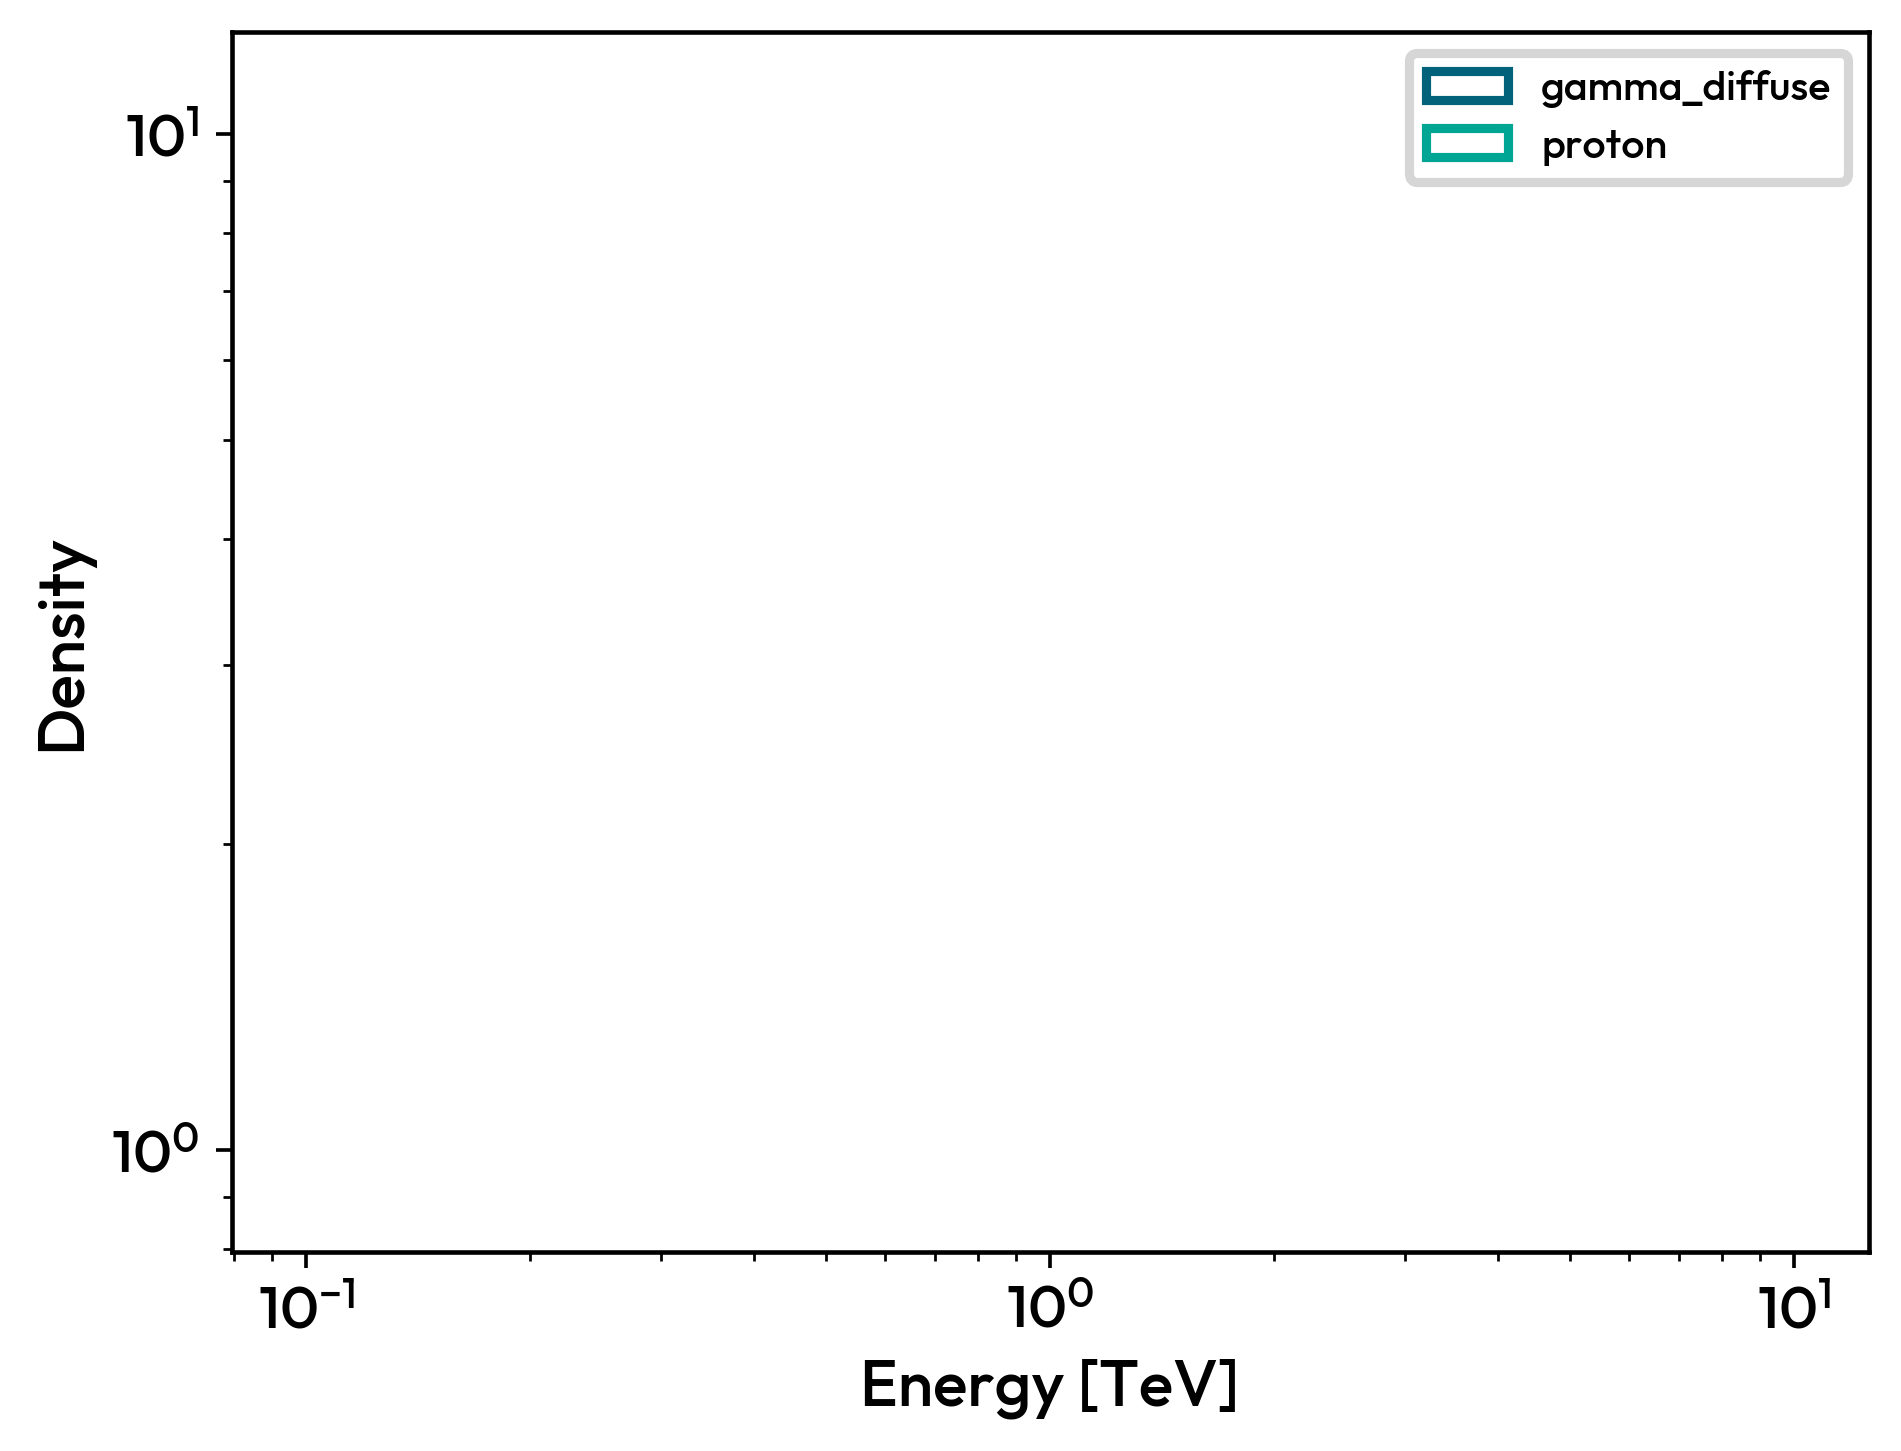

In [16]:
trimodel.plot_DL2_energy(zenith, azimuth, [ParticleType.GAMMA_DIFFUSE, ParticleType.PROTON])

/home/hugo/TM/CTLearn-Manager/src/ctlearn_manager/tri_model.py:2531: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


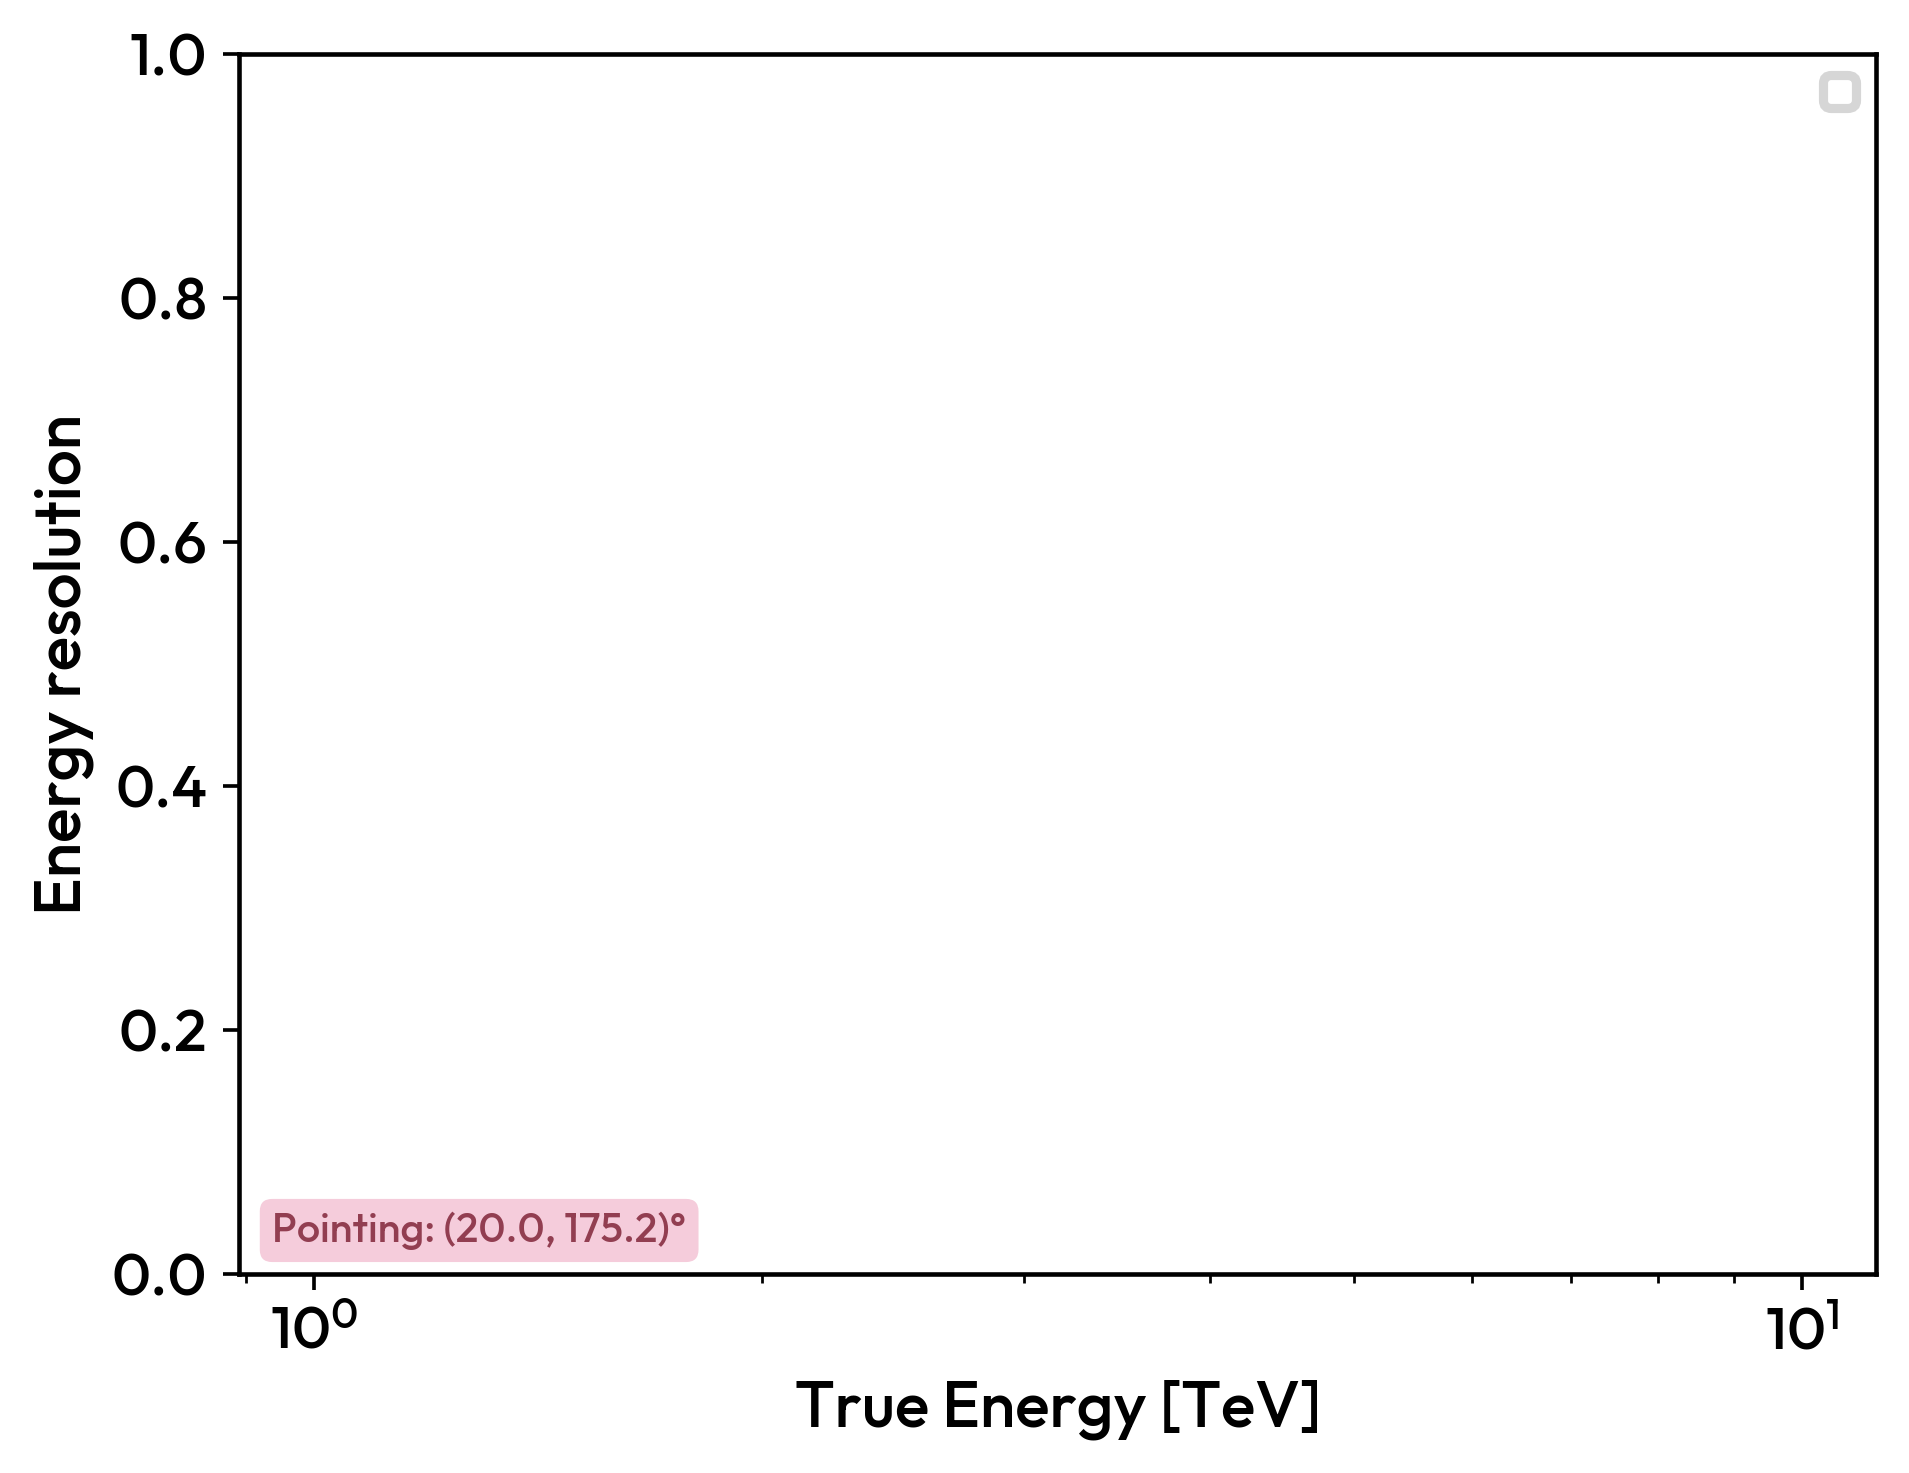

In [17]:
trimodel.plot_energy_resolution_DL2(zeniths, azimuths, particle_type=[ParticleType.GAMMA_DIFFUSE, ParticleType.PROTON])

In [18]:
# Prediction file analysis

prediction_directory = os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "test", "proton")
prediction_file =  os.path.join(prediction_directory, "proton_400_1300E3GeV_20_20deg_ATM52_206092.corsika.gz.NSBmed4.simtel.h5")

In [19]:
with h5py.File(prediction_file, "r") as f:
    print("Keys in file:", list(f.keys()))
    structure = True
    if structure: 
        def print_structure(name, obj):
            print(name, "->", type(obj))
        f.visititems(print_structure)  
    energy_predict = f["dl2/event/subarray/energy/CTLearn"]["event_id", "CTLearn_energy", "CTLearn_energy_uncert", "CTLearn_is_valid", "CTLearn_goodness_of_fit"]
    type_predict = f["dl2/event/subarray/classification/CTLearn"]["event_id", "CTLearn_prediction", "CTLearn_is_valid", "CTLearn_goodness_of_fit"]
    print(energy_predict.dtype)
    print(type_predict.dtype)
    energy_predict = energy_predict[:]
    energy_df = pd.DataFrame(energy_predict)
    type_predict = type_predict[:]
    type_df = pd.DataFrame(type_predict)

Keys in file: ['configuration', 'dl1', 'dl2', 'r1', 'simulation']
configuration -> <class 'h5py._hl.group.Group'>
configuration/instrument -> <class 'h5py._hl.group.Group'>
configuration/instrument/subarray -> <class 'h5py._hl.group.Group'>
configuration/instrument/subarray/layout -> <class 'h5py._hl.dataset.Dataset'>
configuration/instrument/telescope -> <class 'h5py._hl.group.Group'>
configuration/instrument/telescope/camera -> <class 'h5py._hl.group.Group'>
configuration/instrument/telescope/camera/geometry_0 -> <class 'h5py._hl.dataset.Dataset'>
configuration/instrument/telescope/camera/geometry_1 -> <class 'h5py._hl.dataset.Dataset'>
configuration/instrument/telescope/camera/readout_0 -> <class 'h5py._hl.dataset.Dataset'>
configuration/instrument/telescope/camera/readout_1 -> <class 'h5py._hl.dataset.Dataset'>
configuration/instrument/telescope/optics -> <class 'h5py._hl.dataset.Dataset'>
configuration/observation -> <class 'h5py._hl.group.Group'>
configuration/observation/observa

In [20]:
energy_df.head()

,event_id,CTLearn_energy,CTLearn_energy_uncert,CTLearn_is_valid,CTLearn_goodness_of_fit
0,1004,4.948373,0.000000,1,NaN
1,1006,4.101346,0.000000,1,NaN
2,1025,4.897706,0.510018,1,NaN
3,1066,4.848511,0.096944,1,NaN
4,1099,3.587427,0.000000,1,NaN


In [21]:
type_df.head()

,event_id,CTLearn_prediction,CTLearn_is_valid,CTLearn_goodness_of_fit
0,1004,0.483929,1,NaN
1,1006,0.566832,1,NaN
2,1025,0.578472,1,NaN
3,1066,0.556802,1,NaN
4,1099,0.590419,1,NaN


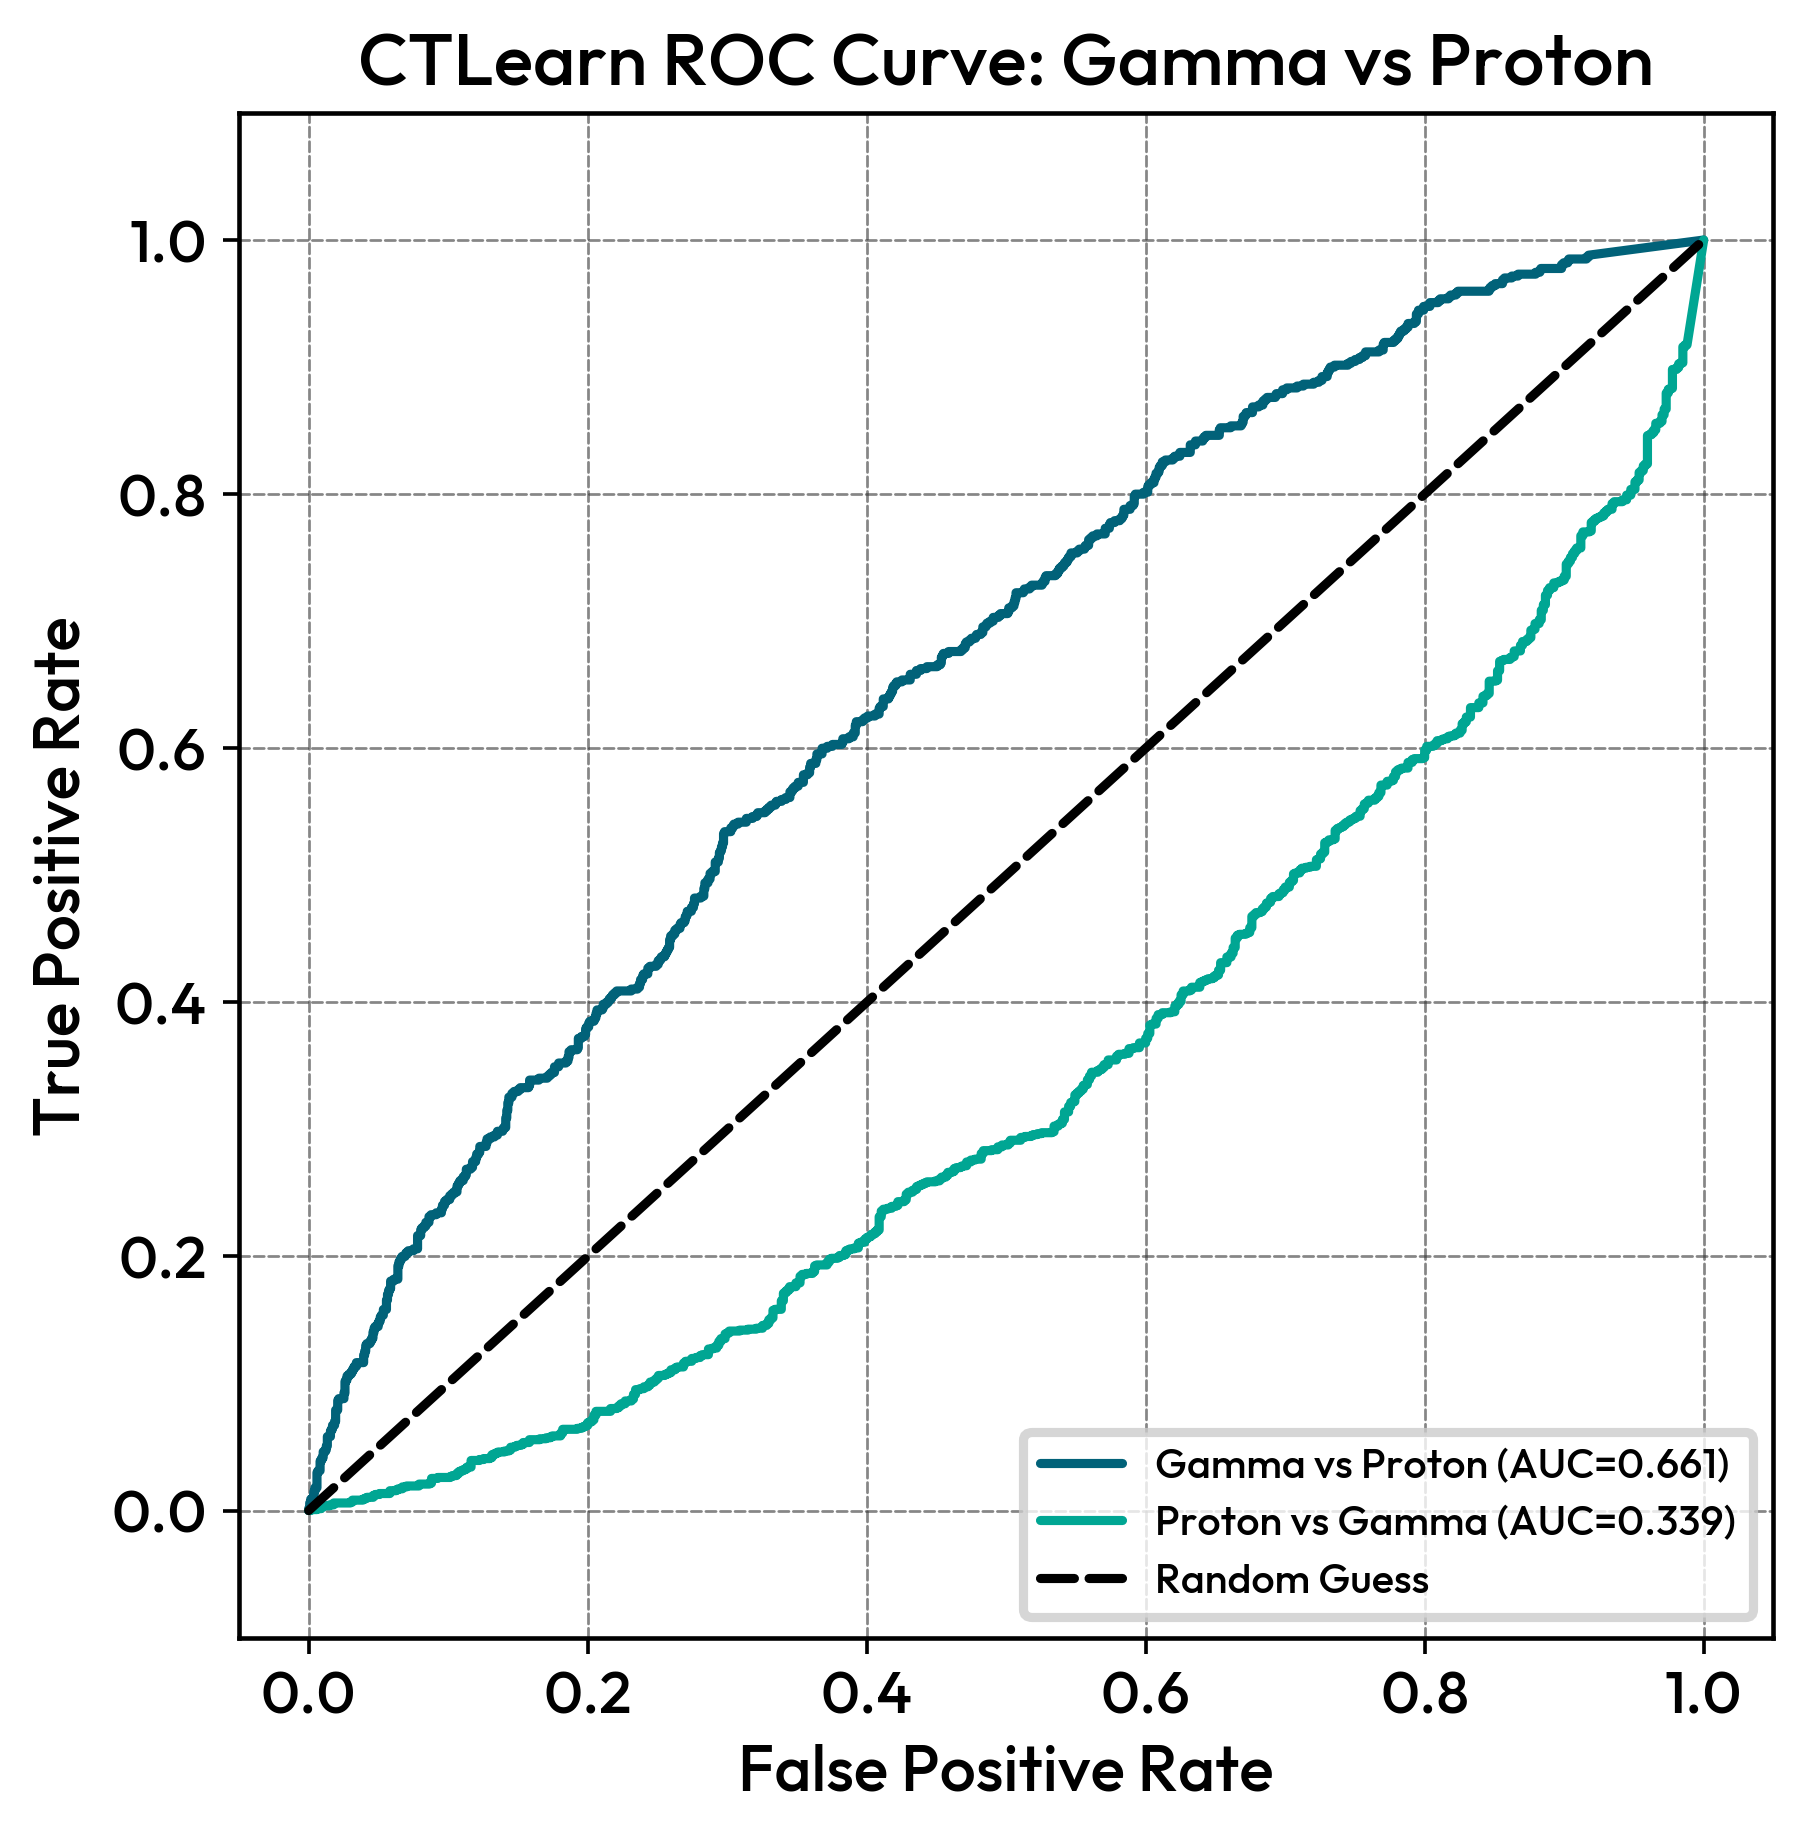

AUC = 0.661


In [22]:
# Evaluate Particle Type
result_folder = os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "test")
mapping = {0: 1, 101: 0}

proton_files = glob.glob(os.path.join(result_folder, "proton", f"proton*.h5"))
gamma_files = glob.glob(os.path.join(result_folder, "gamma_diffuse", f"gamma*.h5"))
df_all = pd.DataFrame()
    
for fileset in [proton_files, gamma_files]:
        for file in fileset:
            with h5py.File(file, 'r') as data:
                # Get DL2 predictions
                if 'dl2/event/subarray/classification/CTLearn' in data:
                    pred_ds = data['dl2/event/subarray/classification/CTLearn']['event_id', 'CTLearn_prediction', 'CTLearn_is_valid', 'CTLearn_goodness_of_fit']
                    pred_ds = pd.DataFrame(pred_ds)
                    pred_ds = pred_ds[pred_ds["CTLearn_is_valid"] == 1]
                    # Ground truth
                    ground_truth = data["simulation/event/subarray/shower"][:]
                    ground_truth_df = pd.DataFrame(ground_truth, columns=["event_id", "true_shower_primary_id"])
                    df = pd.merge(pred_ds, ground_truth_df, on="event_id", how="inner")
                    
                    df["particle_id"] = df["true_shower_primary_id"].map(mapping)
                    df_all = pd.concat([df_all, df], ignore_index=True)
# ROC & AUC
fpr_gamma, tpr_gamma, thresholds_gamma = metrics.roc_curve(df_all["particle_id"], df_all['CTLearn_prediction'], pos_label=1)
auc_gamma = metrics.auc(fpr_gamma, tpr_gamma)

fpr_proton, tpr_proton, thresholds_proton = metrics.roc_curve(df_all["particle_id"], df_all['CTLearn_prediction'], pos_label=0)
auc_proton = metrics.auc(fpr_proton, tpr_proton)


# Plot
plt.figure(figsize=(6,6))
plt.plot(fpr_gamma, tpr_gamma, label=f"Gamma vs Proton (AUC={auc_gamma:.3f})")
plt.plot(fpr_proton, tpr_proton, label=f"Proton vs Gamma (AUC={auc_proton:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CTLearn ROC Curve: Gamma vs Proton")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

print(f"AUC = {auc_gamma:.3f}")

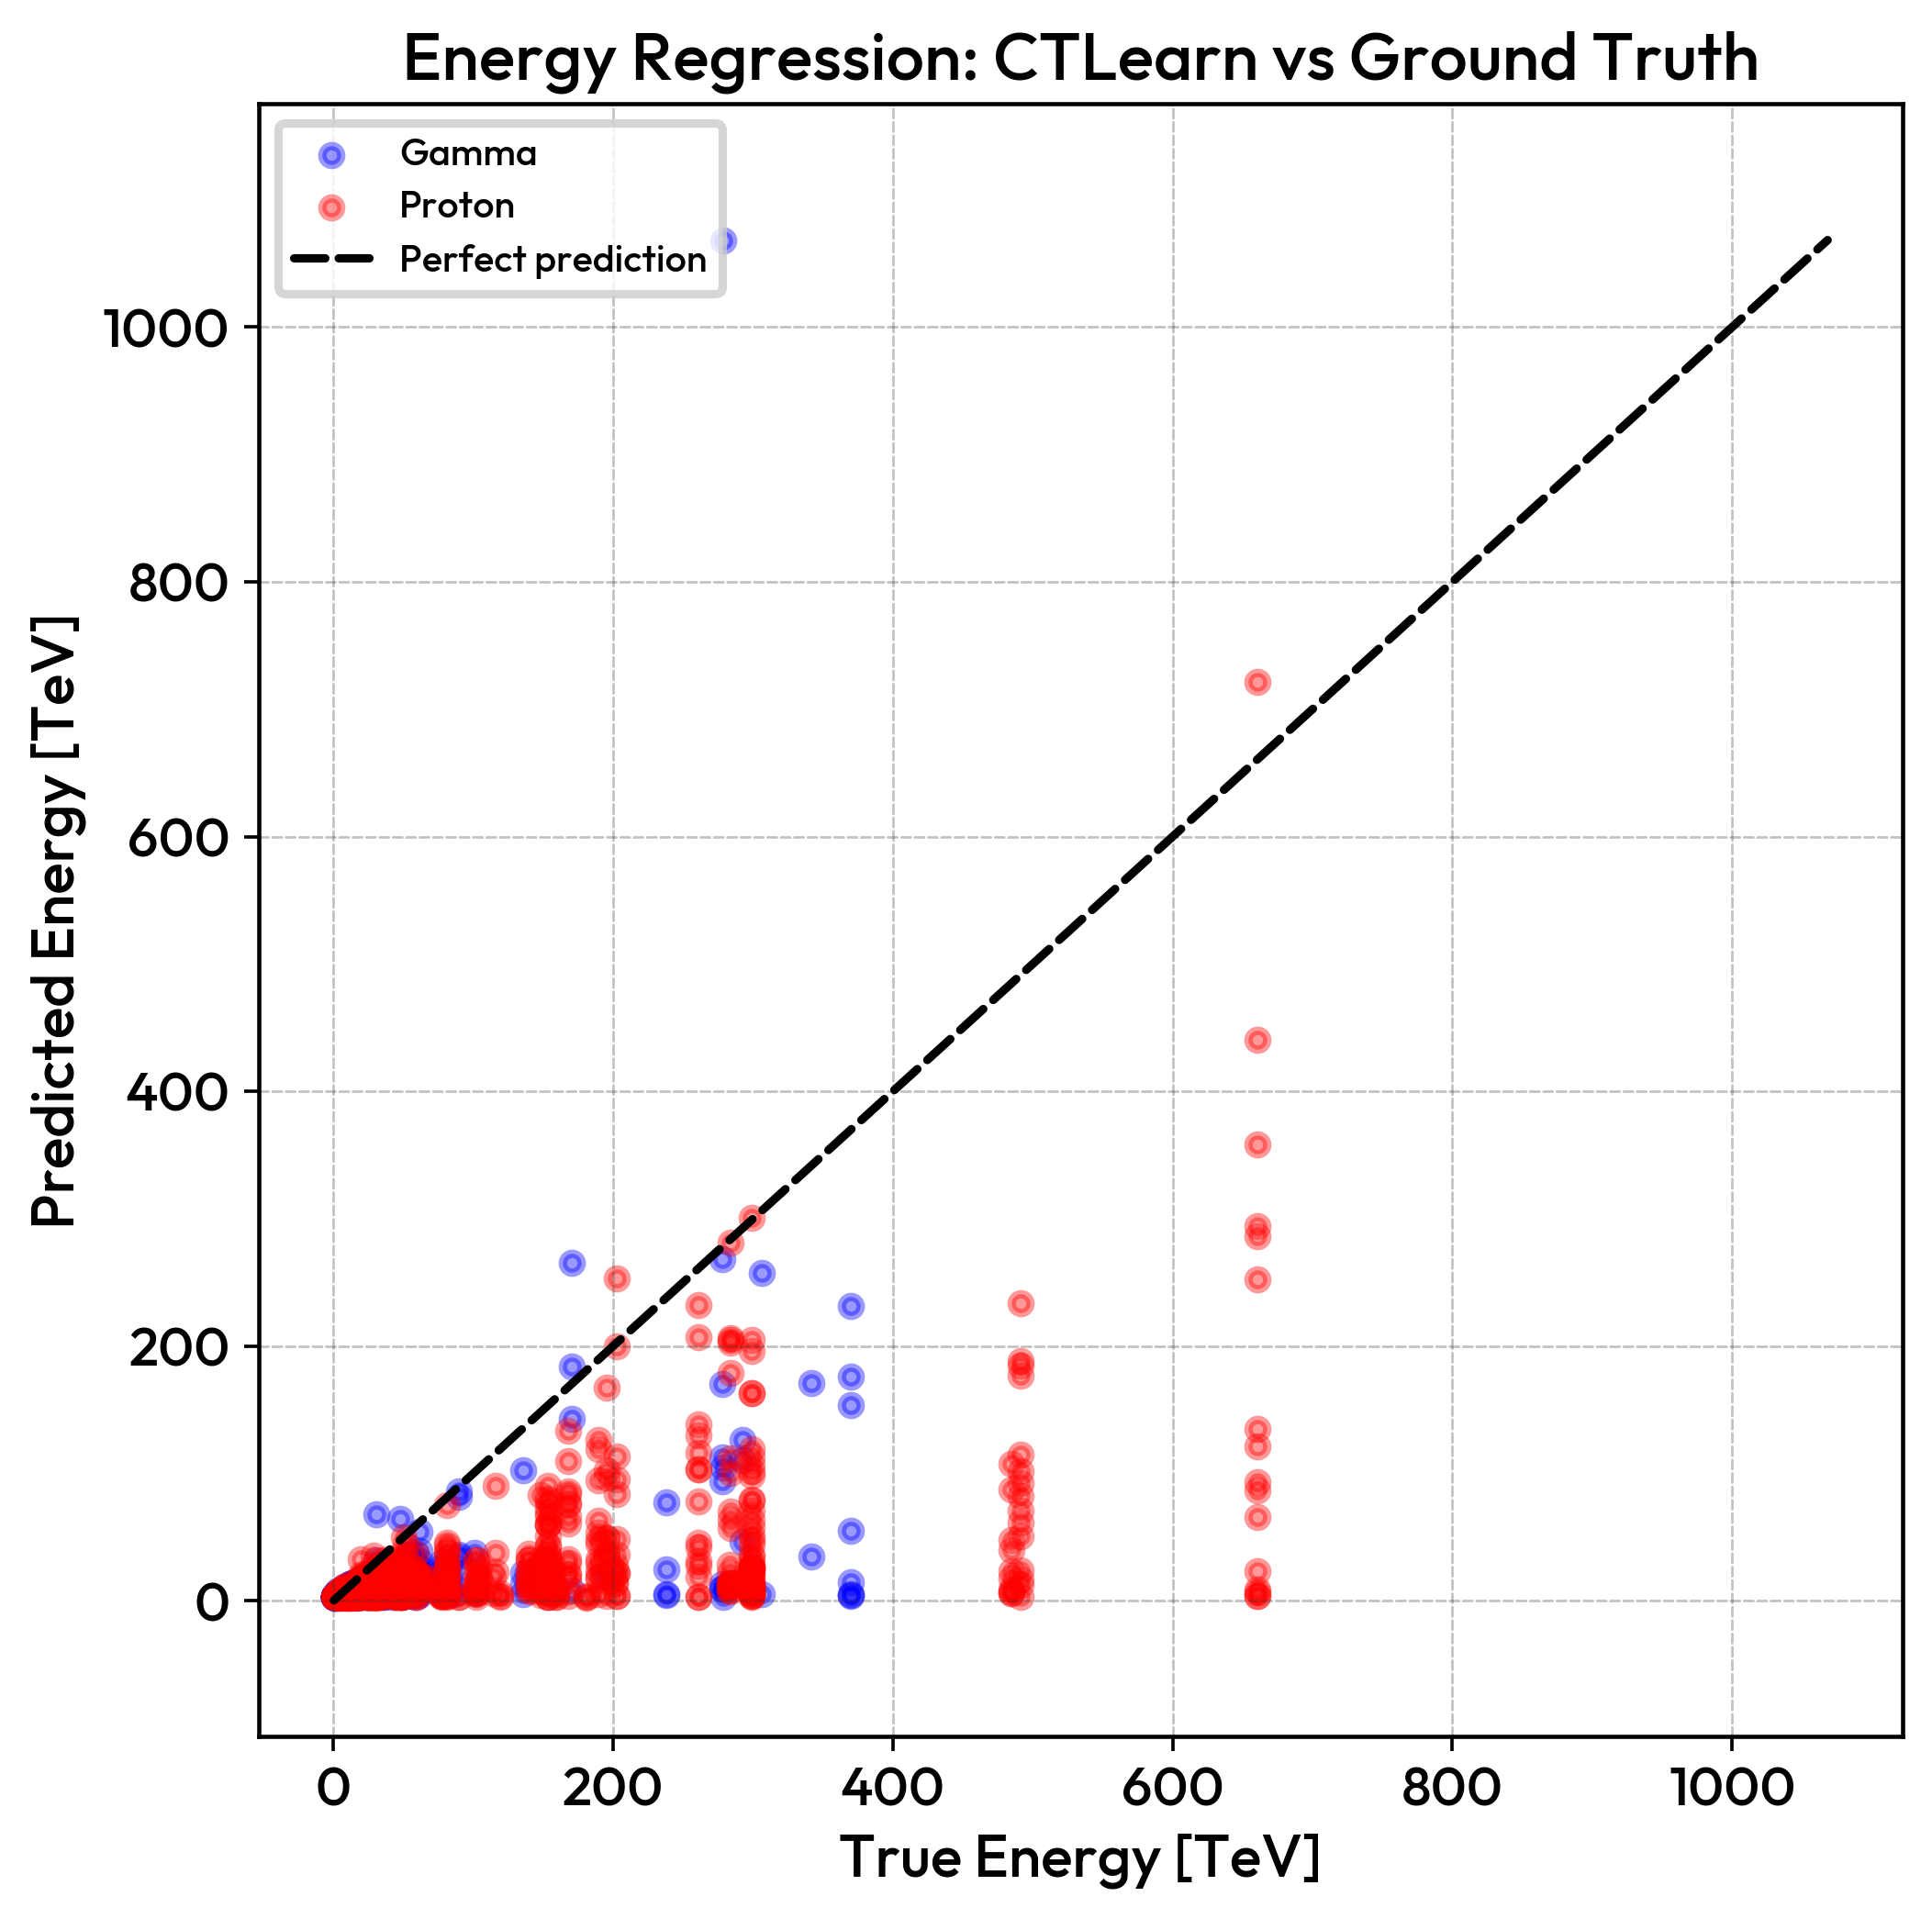

In [23]:
# Evaluate Particle Type
result_folder = os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "test")


proton_files = glob.glob(os.path.join(result_folder, "proton", f"proton*.h5"))
gamma_files = glob.glob(os.path.join(result_folder, "gamma_diffuse", f"gamma*.h5"))
df_all = pd.DataFrame()
for fileset in [proton_files, gamma_files]:
        for file in fileset:
            with h5py.File(file, 'r') as data:
                # Get DL2 predictions
                if 'dl2/event/subarray/energy/CTLearn' in data:
                    pred_ds = data['dl2/event/subarray/energy/CTLearn']['event_id', 'CTLearn_energy', 'CTLearn_is_valid', 'CTLearn_energy_uncert']
                    pred_ds = pd.DataFrame(pred_ds)
                    pred_ds = pred_ds[pred_ds["CTLearn_is_valid"] == 1]
                    # Ground truth
                    ground_truth = data["simulation/event/subarray/shower"][:]
                    ground_truth_df = pd.DataFrame(ground_truth, columns=["event_id", "true_energy", "true_shower_primary_id"])
                    df = pd.merge(pred_ds, ground_truth_df, on="event_id", how="inner")
                    df_all = pd.concat([df_all, df], ignore_index=True)


protons_df = df_all[df_all["true_shower_primary_id"] == 101]
gammas_df = df_all[df_all["true_shower_primary_id"] == 0]

plt.figure(figsize=(7,7))

# Scatter plot: predicted vs true
plt.scatter(gammas_df["true_energy"], gammas_df["CTLearn_energy"], 
            alpha=0.4, label="Gamma", s=20, color="blue")
plt.scatter(protons_df["true_energy"], protons_df["CTLearn_energy"], 
            alpha=0.4, label="Proton", s=20, color="red")

lims = [min(df["true_energy"].min(), df["CTLearn_energy"].min()), 
        max(df["true_energy"].max(), df["CTLearn_energy"].max())]
plt.plot(lims, lims, 'k--', lw=2, label="Perfect prediction")

plt.xlabel("True Energy [TeV]")
plt.ylabel("Predicted Energy [TeV]")
plt.legend()
plt.title("Energy Regression: CTLearn vs Ground Truth")
plt.grid(alpha=0.3)
plt.show()

In [60]:
with h5py.File(prediction_file, "r") as f:
    print("Keys in file:", list(f.keys()))
    structure = False
    if structure: 
        def print_structure(name, obj):
            print(name, "->", type(obj))
        f.visititems(print_structure)  
    predict = f["simulation/event/telescope/images/tel_001"]
    print(predict.dtype)

Keys in file: ['configuration', 'dl1', 'dl2', 'r1', 'simulation']
[('obs_id', '<i4'), ('event_id', '<i8'), ('tel_id', '<i2'), ('true_image_sum', '<i4')]


In [38]:
# IRF
irf_file = os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "IRFs", "irfs.h5")
trimodel.merge_DL2_files(zenith, azimuth,
                            output_file = irf_file,
                            particle_type = ParticleType.GAMMA_DIFFUSE,
                            overwrite=True)

🔀 Merging DL2 gamma_diffuse files for zenith 20.0 deg and azimuth 175.1963 deg
Running : ctapipe-merge /home/hugo/TM/ml/trimodel/test/gamma_diffuse/gamma_200_800E3GeV_20_20deg_ATM52_100505.corsika.gz.NSBmed4.simtel.h5 /home/hugo/TM/ml/trimodel/test/gamma_diffuse/gamma_200_800E3GeV_20_20deg_ATM52_100575.corsika.gz.NSBmed4.simtel.h5 /home/hugo/TM/ml/trimodel/test/gamma_diffuse/gamma_200_800E3GeV_20_20deg_ATM52_110055.corsika.gz.NSBmed4.simtel.h5 --output=/home/hugo/TM/ml/trimodel/IRFs/irfs.h5 --progress --MergeTool.skip_broken_files=True --overwrite


Merging: 100%|██████████| 3/3 [00:07<00:00,  2.58s/Files]


Original files still exist and were not erased.


In [36]:
irf_folder = os.path.join(ctlearn_mgr_config.workspace_path, "trimodel", "IRFs")
config = os.path.join(ctlearn_mgr_config.base_dir, "config", "conf_irf.yml")
output_cuts_file = f"{irf_folder}/cuts_{zenith.value:.2f}_{azimuth.value:.2f}.fits"
output_irf_file = f"{irf_folder}/IRFs_{zenith.value:.2f}_{azimuth.value:.2f}.fits"
output_benchmark_file = f"{irf_folder}/benchmark_{zenith.value:.2f}_{azimuth.value:.2f}.fits"

In [37]:
trimodel.produce_irfs(zenith, azimuth,
                          config=config,
                          output_cuts_file=output_cuts_file,
                          output_irf_file=output_irf_file,
                          output_benchmark_file=output_benchmark_file,
                          pointlike=False,
                          electrons=False,
                          protons=False
                          )

⚠️⚠️⚠️ DO NOT DELETE OR MOVE CONFIG FILES, they are used extensively in the code for plotting.
ctapipe-optimize-event-selection -c /home/hugo/TM/config/conf_irf.yml --gamma-file /home/hugo/TM/ml/trimodel/IRFs/irfs.h5  --proton-file /home/hugo/TM/ml/trimodel/IRFs/irfs.h5  --output /home/hugo/TM/ml/trimodel/IRFs/cuts_20.00_175.20.fits --overwrite True


/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctapipe/io/tableloader.py:138: IndexNotMatching: Table order does not match, falling back to join
  warnings.warn(
2025-09-24 18:21:03,867 ERROR [ctapipe.ctapipe-optimize-event-selection] (tool.run): Caught unexpected exception: Tables must have identical length, 3709 != 3348
Traceback (most recent call last):
  File "/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctapipe/core/tool.py", line 445, in run
    self.start()
  File "/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctapipe/tools/optimize_event_selection.py", line 150, in start
    events, count, meta = loader.load_preselected_events(
  File "/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctapipe/irf/preprocessing.py", line 226, in load_preselected_events
    for _, _, events in load.read_subarray_events_chunked(chunk_size, **opts):
  File "/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctapipe/io/

RuntimeError: Error: Failed to produce cuts file for zenith 20.0 deg and azimuth 175.1963 deg